In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pmdarima import auto_arima

In [3]:
data_final = pd.read_excel(r"C:\Users\Ananta Kumaar V R\OneDrive\Desktop\PC_2023.xlsx")
#data = data.iloc[6:-1,:]
data_final.shape

(162, 31)

In [4]:
data_final.isnull().sum()

Date                       0
PC Sales                  24
PC-Diesel                 24
PC-Gasoline               24
Wholesale trading(mil)    24
Retail trading(mil)       24
M1                        24
M3                        24
BEI                       24
IIP                       24
PMI                       24
CC                        24
WPI                       24
GDP                       24
CMR                       24
Vloans                    24
Ind_freight               24
Diesel Rates              24
Season_Index              24
GVA Mining                24
GVA_Cons                  24
GVA_Manu                  24
Evnt_Pos                  24
Evnt_Negative             24
COSPI1                    24
COSPI                     24
Agriculture               24
Electricity               24
Construction              24
Trade                     24
Real estate               24
dtype: int64

In [5]:
data_final.columns

Index(['Date', 'PC Sales', 'PC-Diesel ', 'PC-Gasoline ',
       'Wholesale trading(mil)', 'Retail trading(mil)', 'M1', 'M3', 'BEI',
       'IIP', 'PMI', 'CC', 'WPI', 'GDP', 'CMR', 'Vloans', 'Ind_freight',
       'Diesel Rates', 'Season_Index', 'GVA Mining', 'GVA_Cons', 'GVA_Manu',
       'Evnt_Pos ', 'Evnt_Negative', 'COSPI1', 'COSPI', 'Agriculture',
       'Electricity', 'Construction ', 'Trade', 'Real estate'],
      dtype='object')

In [6]:
## Setting the index to year_month - this will help in mapping the predictions to the correct year-month
data_final.set_index('Date',inplace=True)

In [7]:
columns_to_forecast = ['PC-Diesel ','Wholesale trading(mil)', 'PMI','CMR','GVA_Cons']

In [9]:
data= data_final.filter(columns_to_forecast).copy()
data.shape

(162, 5)

In [10]:
data

,PC-Diesel,Wholesale trading(mil),PMI,CMR,GVA_Cons
Date,,,,,
2011-07-01,77546.0,197985.0,52.1,7.180400,607395.833333
2011-08-01,115622.0,197985.0,52.8,7.228000,607395.833333
2011-09-01,113535.0,197985.0,53.1,7.450455,607395.833333
2011-10-01,92760.0,215812.0,52.8,7.704167,630319.266667
2011-11-01,103040.0,215812.0,51.3,7.687391,630319.266667
...,...,...,...,...,...
2024-08-01,NaN,NaN,NaN,NaN,NaN
2024-09-01,NaN,NaN,NaN,NaN,NaN
2024-10-01,NaN,NaN,NaN,NaN,NaN


24 PC-Diesel 
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2860.719, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2990.534, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2877.340, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2931.667, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2996.502, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2898.934, Time=0.06 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=2862.108, Time=0.25 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=2861.735, Time=0.63 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=2878.809, Time=0.22 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=2863.641, Time=0.94 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2859.846, Time=0.13 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2896.971, Time=0.05 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=2861.283, Time=0.22 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=2860.928, Time=0.82 sec
 ARIM

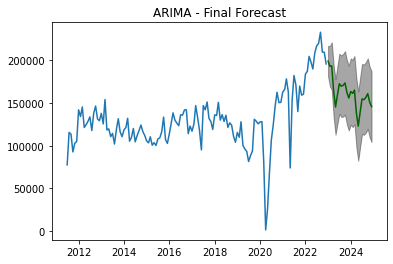

24 Wholesale trading(mil)
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=3017.416, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3247.128, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3024.782, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3152.812, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3246.862, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=3051.833, Time=0.08 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=3019.257, Time=0.36 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=3019.408, Time=0.75 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=3026.881, Time=0.22 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=3019.776, Time=2.01 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=3015.349, Time=0.16 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3050.482, Time=0.04 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=3017.105, Time=0.28 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=3017.328, Time=0.

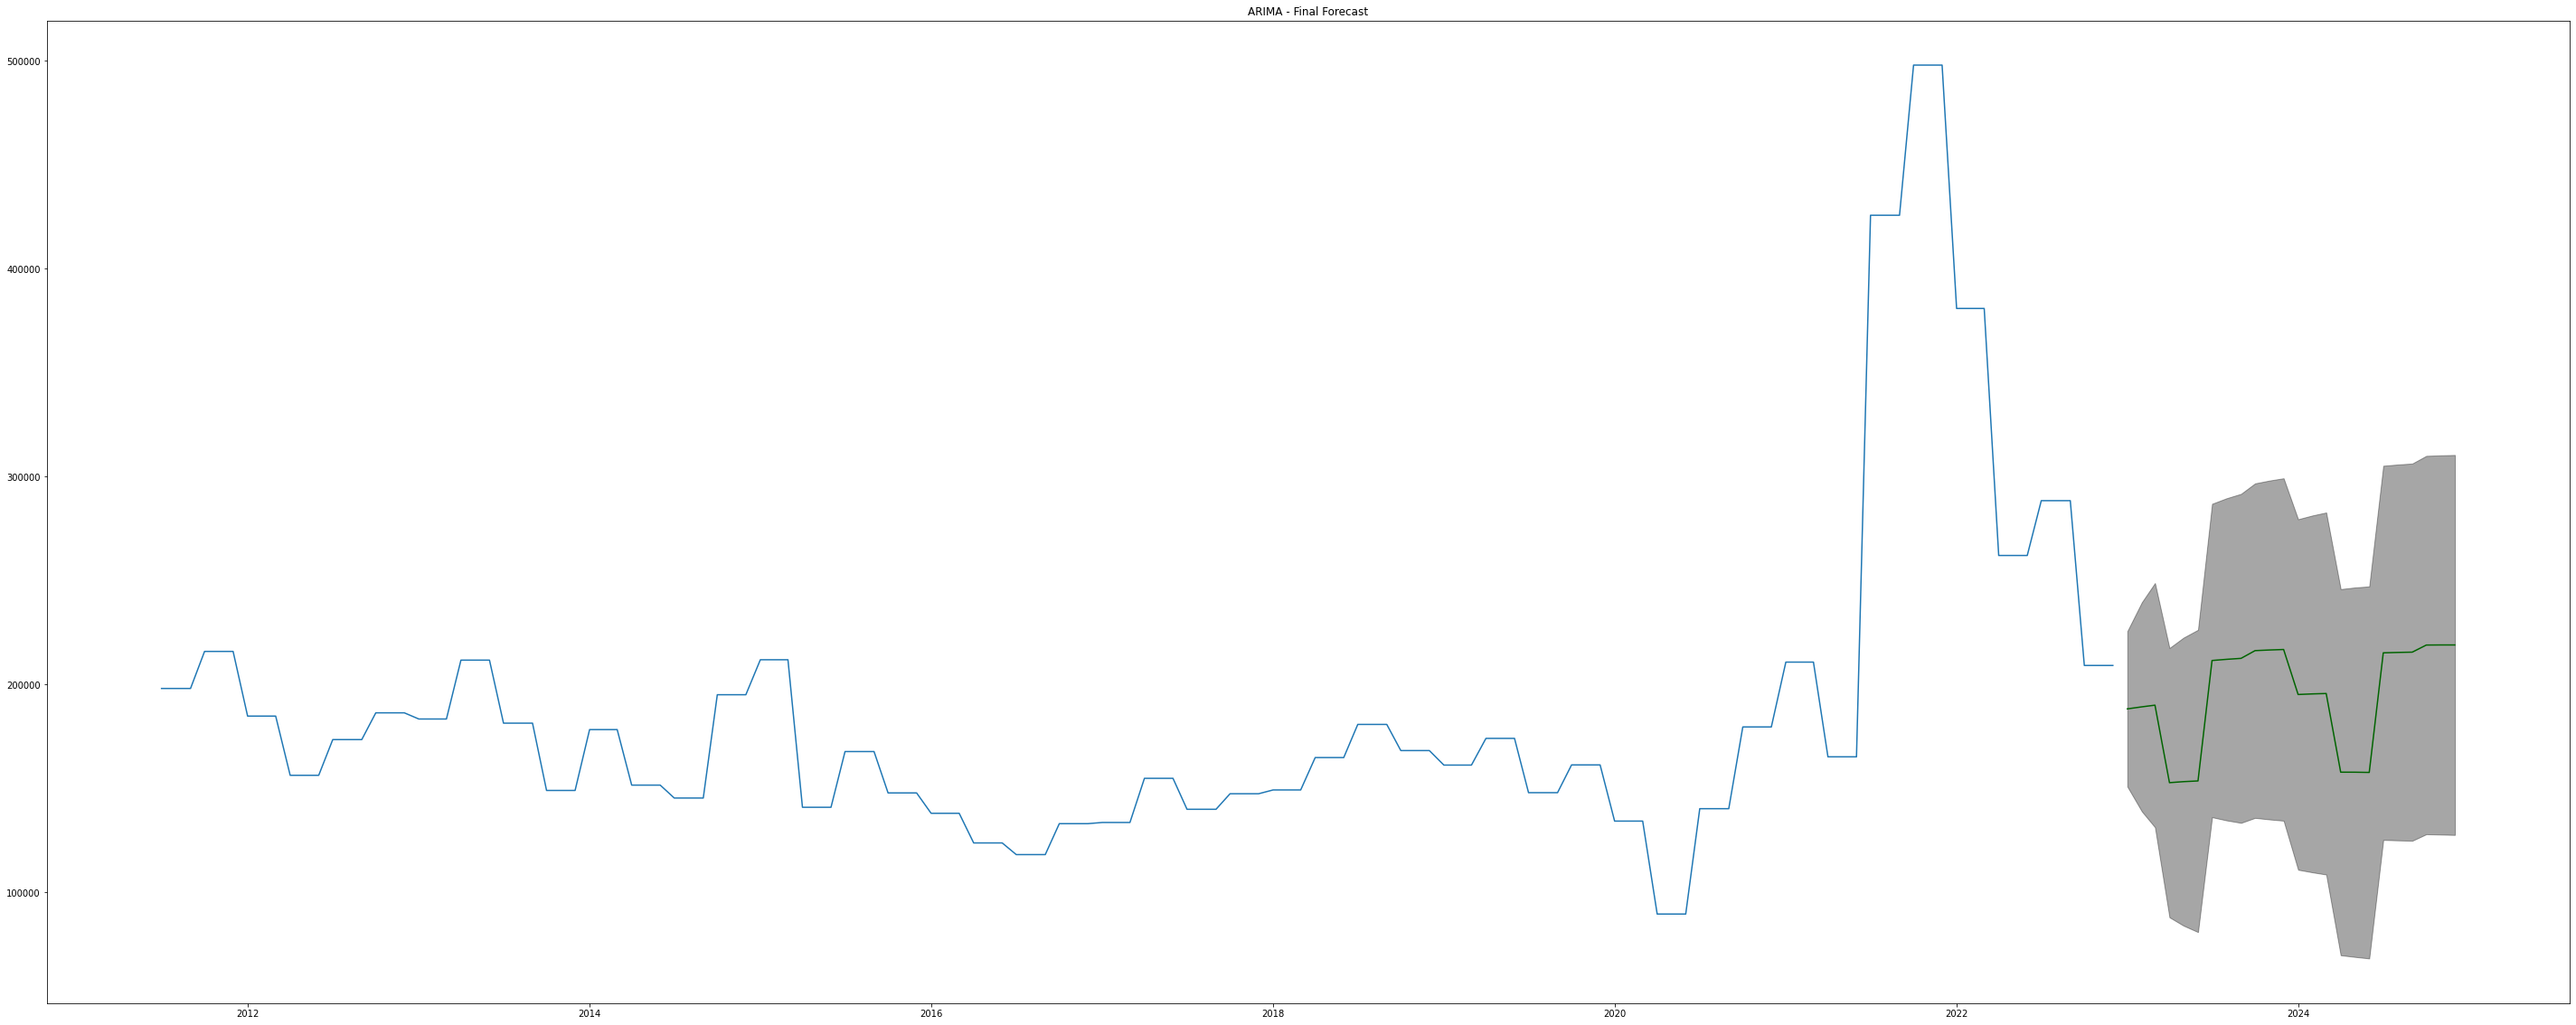

24 PMI
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=765.901, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=686.130, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=764.131, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=714.656, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=660.324, Time=0.62 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=650.042, Time=0.75 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=651.836, Time=1.21 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=3.09 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=711.051, Time=0.68 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=645.748, Time=1.80 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=655

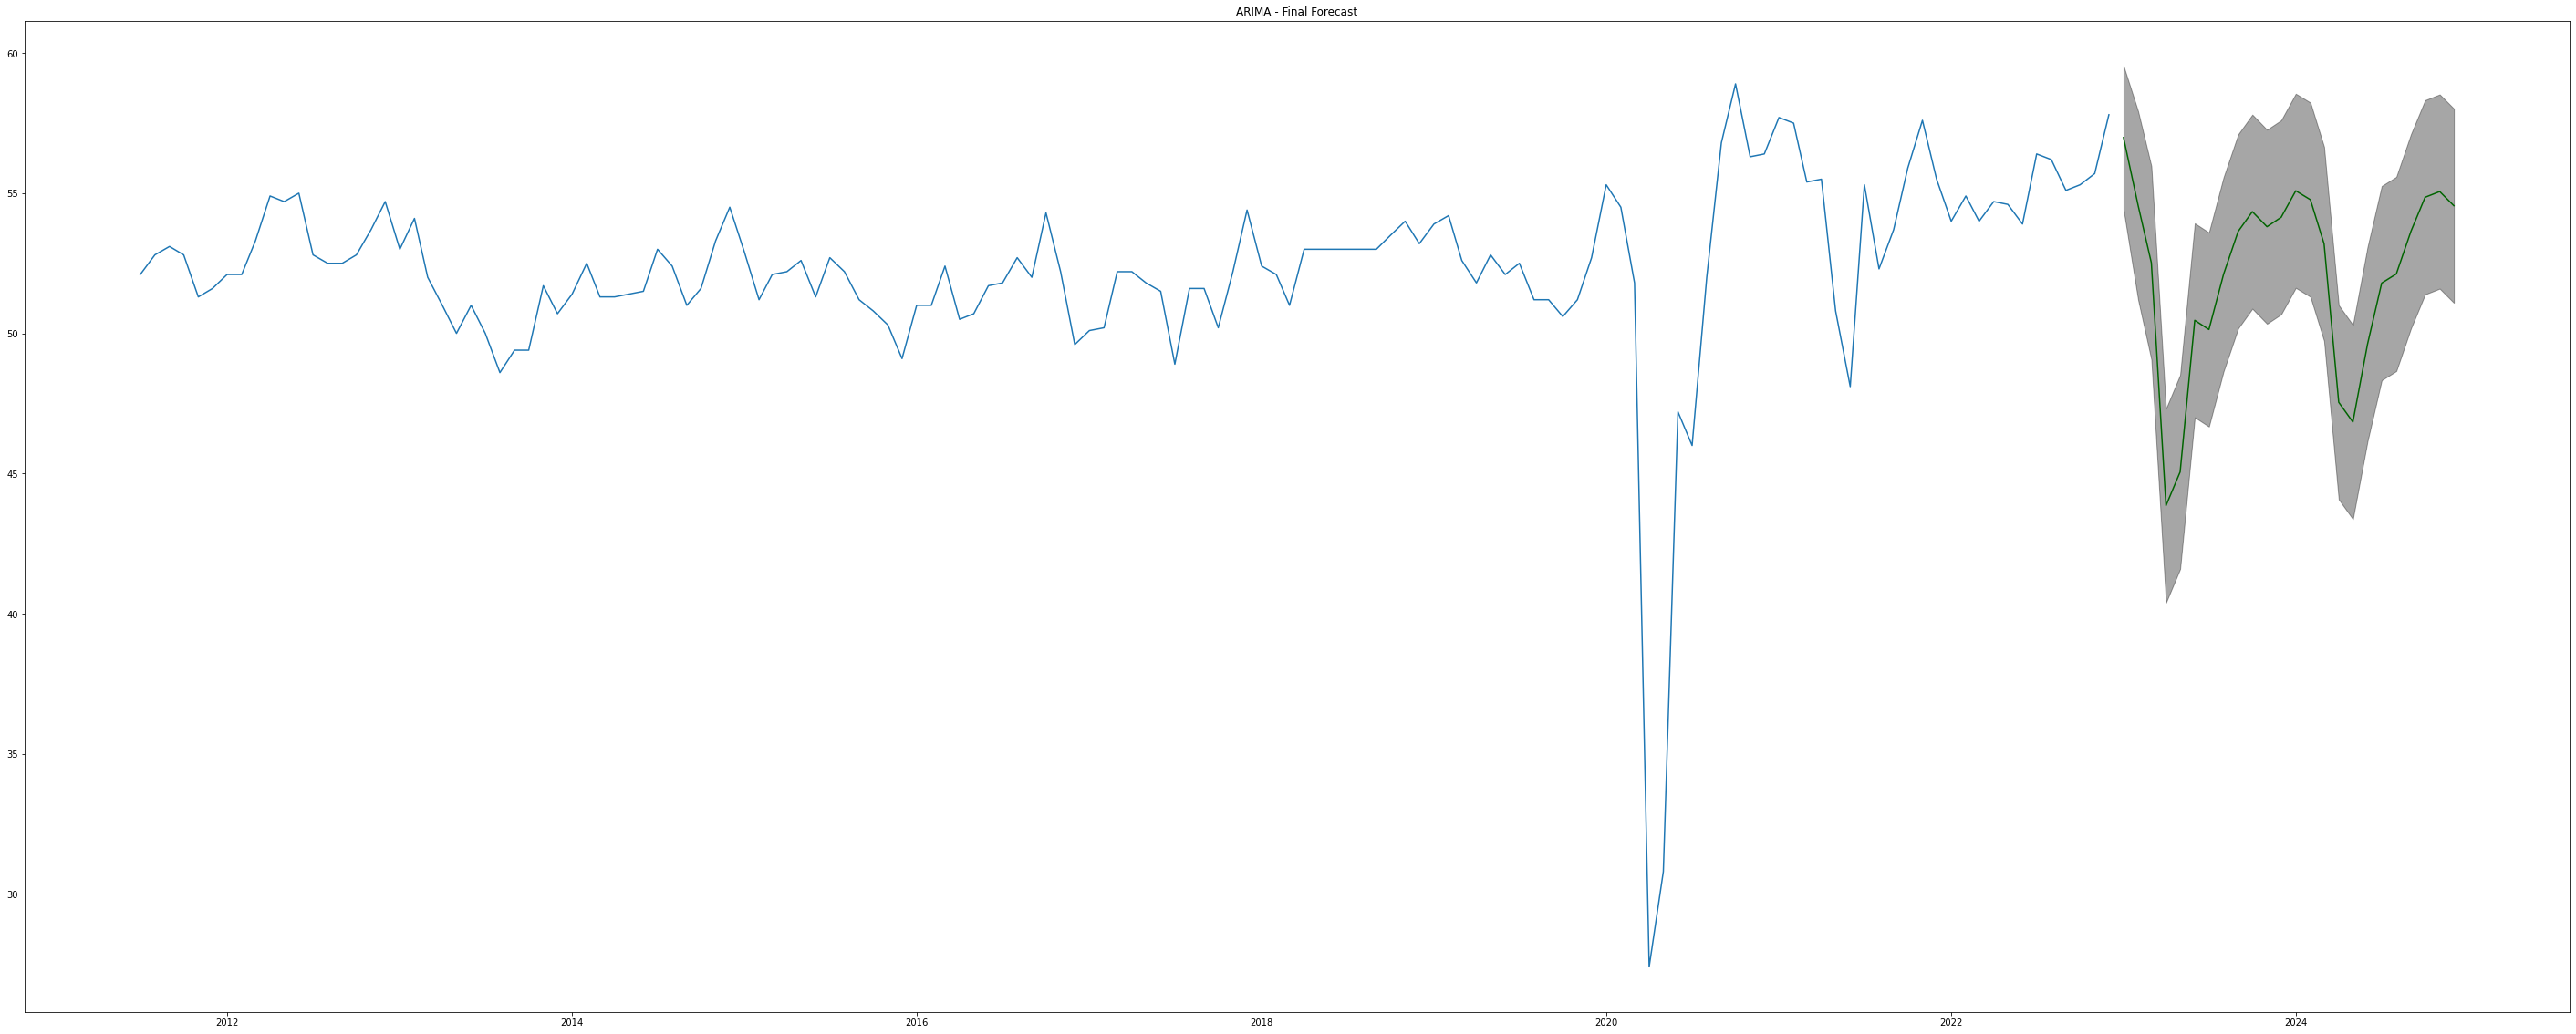

24 CMR
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=590.594, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=414.581, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=590.465, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=444.808, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=407.381, Time=0.53 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=570.836, Time=0.43 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=407.786, Time=0.69 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=407.672, Time=0.75 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=462.732, Time=0.75 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=405

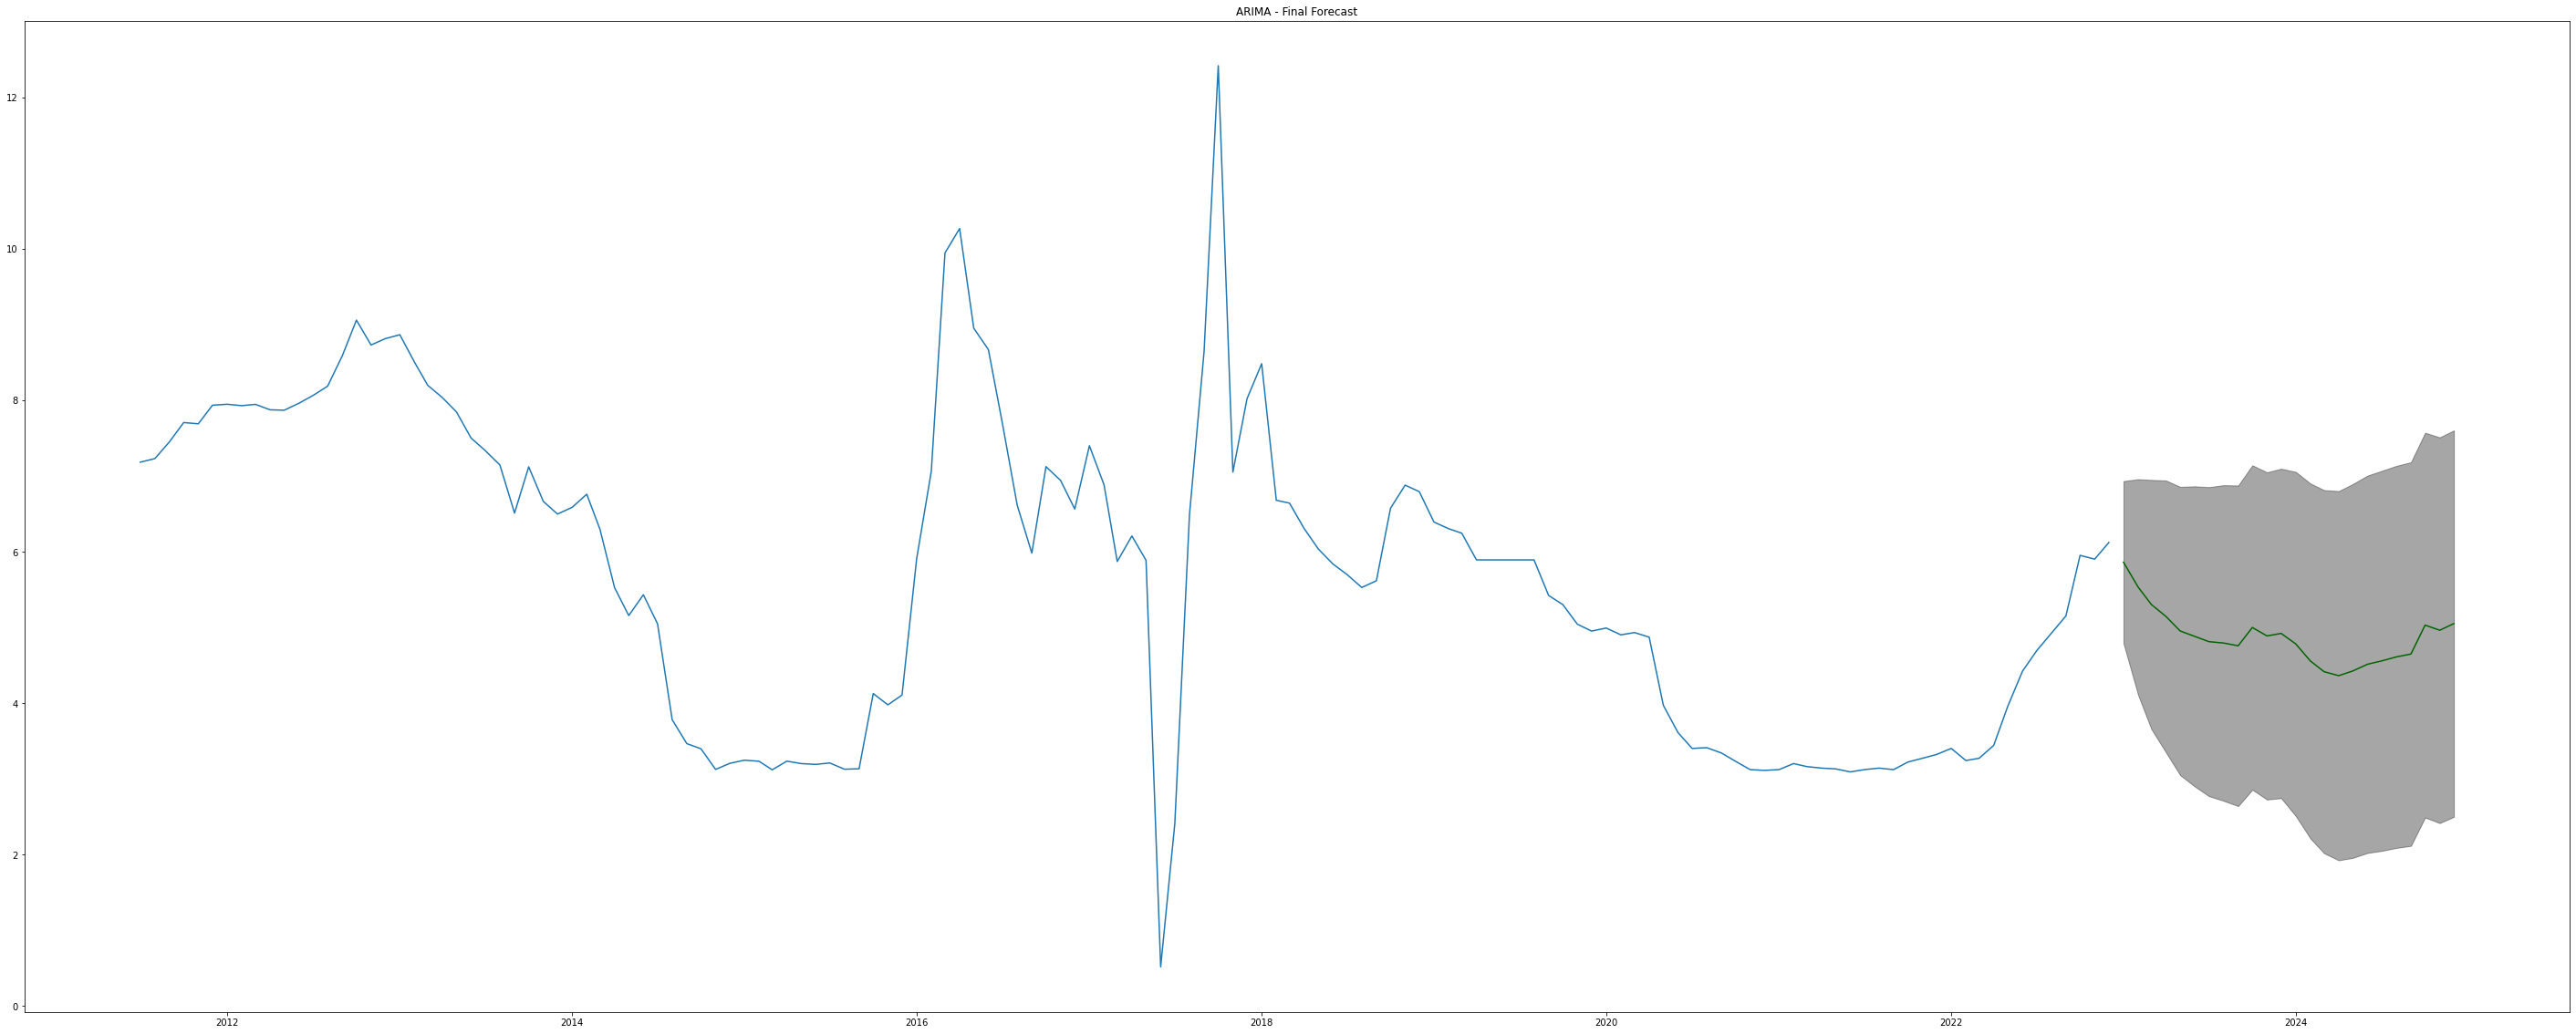

24 GVA_Cons
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=3249.662, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3382.962, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3254.433, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3316.929, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3415.601, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=3261.584, Time=0.06 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=3248.402, Time=0.27 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=3255.479, Time=0.19 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=3250.386, Time=0.92 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=3250.341, Time=0.89 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=3249.747, Time=0.82 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=3251.625, Time=0.75 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=3251.246, Time=1.26 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=3315.648, Time=0.23 sec
 ARIMA(

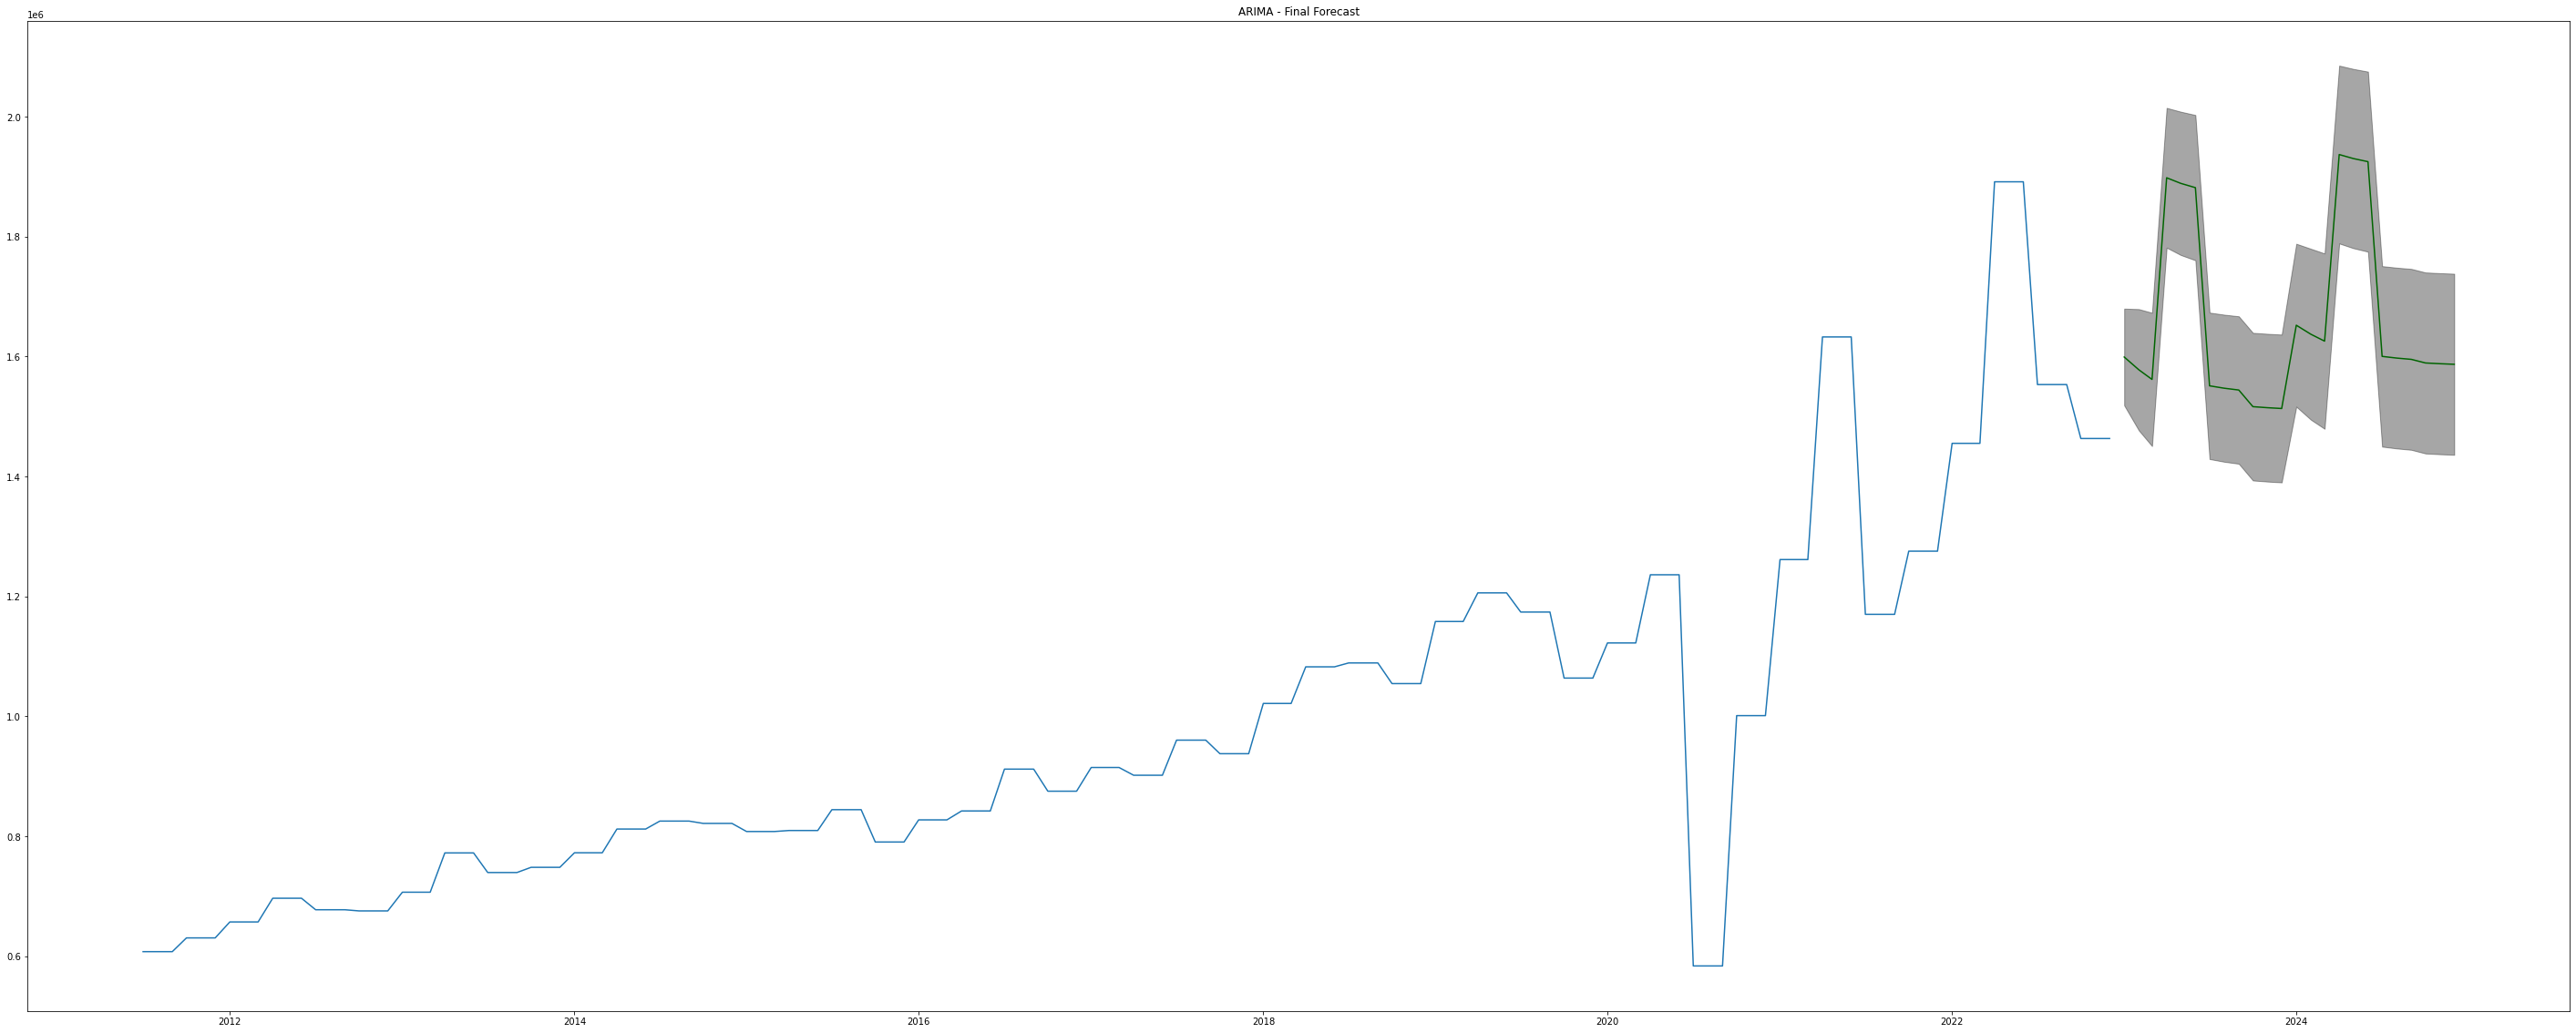

In [11]:
for c in columns_to_forecast:
    #periods of forecast - where we have nan in the series
    h = data[c].isna().sum()
    print(h,c)
#     using the past values for training
    train = data[~data[c].isna()]
    test = data[data[c].isna()]
    train_c = train[c]
    model = auto_arima(train_c, start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True,
                         stepwise=True,alpha=0.35)
    model.fit(train_c)
    forecast = model.predict(n_periods=int(h))
    fitted, confint = model.predict(n_periods=int(h), return_conf_int=True,alpha=0.35)
    print('confidence interval',model.conf_int())
    # make series for plotting purpose
    fitted_series = pd.Series(fitted,index=test.index)
    lower_series = pd.Series(confint[:, 0],index=test.index)
    upper_series = pd.Series(confint[:, 1],index=test.index)
    # Plot
    fig_size = plt.rcParams["figure.figsize"]
    # Set figure width to 12 and height to 9
    fig_size[0] = 50
    fig_size[1] = 20
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(train_c)
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.35)

    plt.title("ARIMA - Final Forecast")
    plt.show()
    # Storing all high, medium and low forecasted values
    data[c+'_fitted'] = train[c].append(fitted_series)
    data[c+'_lower'] = train[c].append(lower_series)
    data[c+'_upper'] = train[c].append(upper_series)

In [12]:
## Resetting the index after the forecast and mapping
#data.reset_index(inplace=True)
#os.chdir('C:/Forecast_2022/ARIMA')

data.to_csv(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Fiinal Forecast\PC_Forecast_2023_2024.csv",index=False)